# Chapter 7 - Porosity-band emergence under deformation

## The (in)stability of perturbations

Our perturbation will take the form of harmonic plane waves,
\begin{equation}
  \label{eq:shearband-perturbation-prototype}
  \por\first(\posvec,t) \propto \e^{i\wavevector\cdot\posvec + s(t)}.
\end{equation}

The orientation of these waves is described by an angle $\bandangle$ to the $x$-axis, as shown in the figure below.

In [1]:
theta = 30.

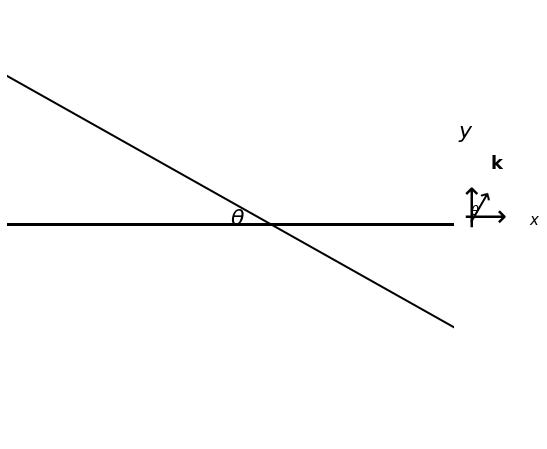

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(4.0 * zoom, 4.0 * zoom)
f.set_facecolor('w')

x = np.linspace(-1.0, 1.0, 1000)
y = np.linspace(-1.0, 1.0, 1000)
[X, Y] = np.meshgrid(x,y)

k0 = 3.*(2.*np.pi)
theta_rad = theta * np.pi/180.
k = np.asarray([k0*np.sin(theta_rad), k0*np.cos(theta_rad)])
z = np.real(np.exp(1.j*(k[0]*X + k[1]*Y)))

# imagesc(x,y,z); axis image; axis xy; hold on;
# colormap('gray'); caxis([-1.5 1.1])
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

plt.plot([-1.1, 1.1], [0.0, 0.0], '-k', linewidth=3)
plt.plot([0.2, 0.2-2.*np.cos(theta_rad)],[0., 2.*np.sin(theta_rad)], '-k', linewidth=2)
plt.plot([0.2, 0.2+2.*np.cos(theta_rad)],[0., -2.*np.sin(theta_rad)],'-k', linewidth=2)
#plot(0.3*[-1 1 0.6],[1 1 1.05]*1.05,'-k')
#plot(0.3*[1 -1 -0.6],-[1 1 1.05]*1.05,'-k')

plt.text(0.0, 0.0, r'$\theta$', fontsize=22)  #, ha='right', va='bottom')

plt.text(1.12, 0.0, r'$\longrightarrow$', fontsize=30) #, ha='left', va='center')
plt.text(1.47, 0.0, r'$x$', fontsize=15) #, ha='left', va='center')

plt.text(1.12, -0.015, r'$\longrightarrow$', fontsize=30, rotation=90) #, ha='left', va='center')
plt.text(1.12, 0.44, r'$y$', fontsize=22) #, ha='left', va='center')

plt.text(1.12, -0.015, r'$\longrightarrow$', fontsize=25, rotation=90-theta) #, ha='left', va='center')
plt.text(1.28, 0.28, r'$\mathbf{k}$', fontsize=18) #, ha='left', va='center')
plt.text(1.18, 0.05, r'$\theta$', fontsize=13) #, ha='right', va='bottom')

ax.set_axis_off()
plt.show()

### Pure shear

The dispersion relation is

\begin{equation}
  \label{eq:pureshear-growthrate}
  \growrate = \pm 2\left(1-\por\zeroth\right)
  \frac{\porweaken\shearstrainrate}{\viscratio\zeroth}
  \frac{\left(2\pi\cmplength_0/\wavelength\right)^2}
  {1+\left(2\pi\cmplength_0/\wavelength\right)^2},
\end{equation}

Dispersion curves showing normalised growth rate of perturbations versus perturbation wavelength are plotted below on log-linear axes:

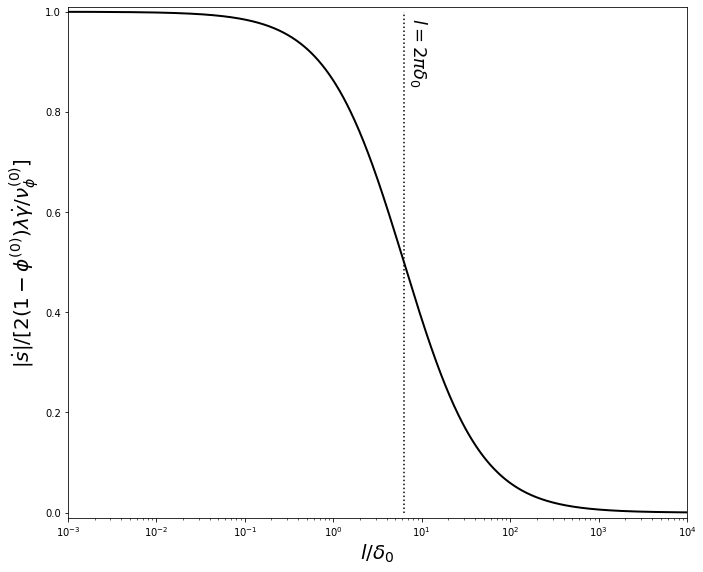

In [3]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(5.55 * zoom, 4.7 * zoom)
f.set_facecolor('w')

x = 2. * np.pi * np.logspace(-6.0, 4.0, 1000)
y = (2*np.pi/x)/(1.0+2.0*np.pi/x)

# CHECK IT
plt.semilogx(x, y, '-k', linewidth=2)
#set(ax(1),'ylim',[],'xlim',10.^[-3 4],'xtick',10.^[-10:2:10],'ytick',[0:0.25:1]);
ax.set_xlim(1e-3, 1e4)
ax.set_ylim(-0.01, 1.01)

plt.plot([2*np.pi, 2*np.pi], [0.0, 1.0],':k')
plt.text(2*np.pi*1.1, 0.85, r'$l=2\pi\delta_{0}$', rotation=-90, va='bottom', fontsize=18)

plt.xlabel(r'$l/\delta_{0}$', fontsize=20)
plt.ylabel(r'$\vert \dot{s}\vert/[2(1-\phi^{(0)})\lambda\dot{\gamma}/\nu^{(0)}_\phi]$', fontsize=20)

plt.show()

and on log-log axes.

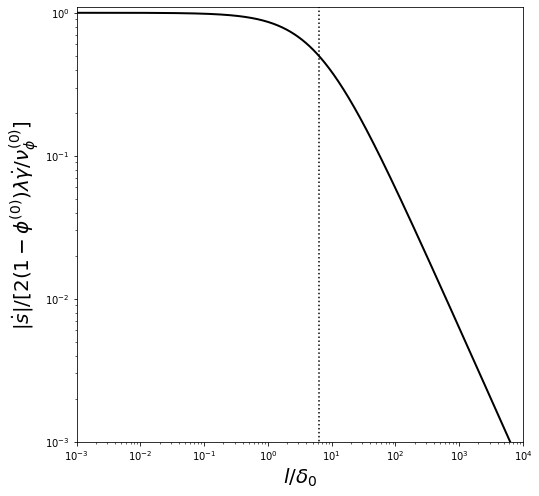

In [4]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(4.0 * zoom, 4.0 * zoom)
f.set_facecolor('w')

x = 2. * np.pi * np.logspace(-6.0, 4.0, 1000)
y = (2.*np.pi/x)/(1.+2.*np.pi/x)

plt.loglog(x, y, '-k', linewidth=2)
#set(ax(2),'xtick',10.^[-10:2:10],'ylim',[1e-3 1.1],'xlim',10.^[-3 4]);
ax.set_xlim(1e-3, 1e4)
ax.set_ylim(1e-3, 1.1)

plt.xlabel(r'$l/\delta_{0}$', fontsize=20)
plt.ylabel(r'$\vert \dot{s}\vert/[2(1-\phi^{(0)})\lambda\dot{\gamma}/\nu^{(0)}_\phi]$', fontsize=20)

plt.plot([2.*np.pi, 2.*np.pi], [1e-10, 10.0], ':k')

plt.show()

### Simple shear

#### Porosity advection by the base-state

Schematic diagram normal to the shear plane showing a representative high-porosity band oriented at an angle $\bandangle$ with normal $\wavevector$. The band is being rotated to higher $\bandangle$ by the simple-shear flow.

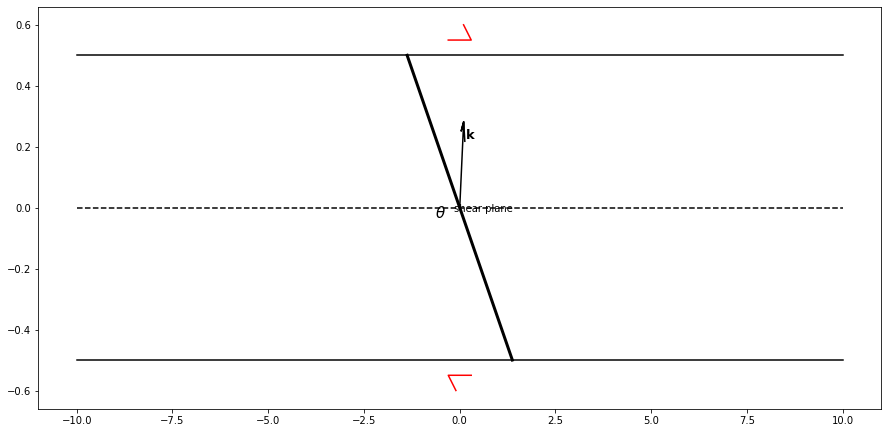

In [13]:
t = np.linspace(0.0, 3.0, 1000)
th2 = 20;

f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(7.55 * zoom, 3.7 * zoom)
f.set_facecolor('w')

plt.plot([-0.5/np.tan(th2*np.pi/180.), 0.5/np.tan(th2*np.pi/180.)], [0.5, -0.5], '-k', linewidth=3)
plt.plot([-10., 10.], [-0.5, -0.5], 'k')
plt.plot([-10., 10.], [0.5, 0.5],'k')
plt.plot([-10., 10.], [0., 0,], '--k')
plt.plot([-0.3, 0.3, 0.1,], [0.55, 0.55, 0.60], 'r')
plt.plot([0.3, -0.3, -0.1], [-0.55, -0.55, -0.6],'r')

al = 0.3
ahl = 0.05
av = np.zeros(5 * 2).reshape(2, 5)
av[0, :] = np.asarray((0., al, al-ahl, al, al-ahl))
av[1, :] = np.asarray((0., 0., ahl, 0., -ahl))
rot = (90.-th2)*np.pi/180.
# aM = np.asarray(((cos(rot), -sin(rot)), (sin(rot), cos(rot)))*[axv; ayv];
M = np.asarray(((np.cos(rot), -np.sin(rot)), (np.sin(rot), np.cos(rot))))
aM = np.dot(M, av)
plt.plot(aM[0, :], aM[1, :], '-k')
plt.text(aM[0, -1], aM[1, -1], r'$\mathbf{k}$', fontsize=13, va='bottom', ha='left')

#set(ax(1),'xlim',0.5/tan((th2-1)*pi/180)*[-1 1],'ylim',0.5/tan((th2-1)*pi/180)*[-1 1],'visible','off');
plt.text(-0.65, -0.04, r'$\theta$', fontsize=15, va='bottom')
plt.text(1.4, -0.02, r'shear plane', fontsize=10, va='bottom', ha='right')

plt.show()

Figure above shows a wave-front with wavevector $\wavevector$ at time $t$. It makes an angle to the shear plane of
\begin{equation}
  \label{eq:simpleshear-bandangle}
  \bandangle(t) = \tan^{-1}\frac{\wavenumber_{0x}}{\wavenumber_{0y} - \shearstrainrate\wavenumber_{0x}t}.
\end{equation}

A plot of band angle from equation \eqref{eq:simpleshear-bandangle} as a function of progressive shear strain (on the $y$-axis) is shown in below.

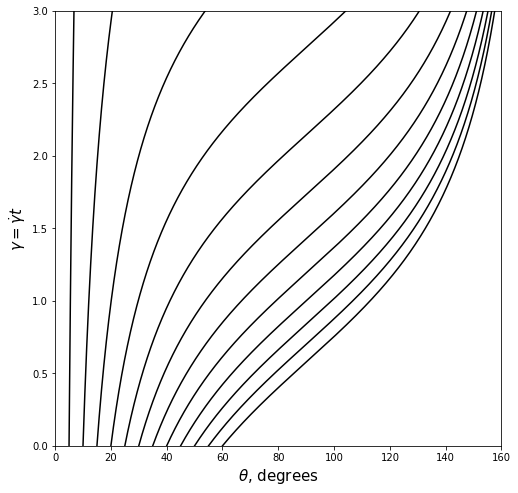

In [14]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(4.0 * zoom, 4.0 * zoom)
f.set_facecolor('w')

th0 = np.arange(5, 61, 5)*np.pi/180.
t = np.linspace(0., 3., 1000)
th = np.asarray([np.arctan2(np.sin(th0i), np.cos(th0i) - t*np.sin(th0i)) for th0i in th0])

for th_ in th:
    plt.plot(th_*180/np.pi, t, '-k')
ax.set_xlim(0., 160.)
ax.set_ylim(0., 3.)
#set(ax(2),'xtick',[0:30:180])
plt.xlabel(r'$\theta$, degrees', fontsize=15)
plt.ylabel(r'$\gamma = \dot{\gamma}t$', fontsize=15)

plt.show()

#### Growth of porosity bands when $\strrexp=1$

The growth rate can be written as
\begin{equation}
  \label{eq:simpleshear-growthrate-angle}
  \growrate = \left(1-\por\zeroth\right)
  \frac{\porweaken\shearstrainrate}{\viscratio\zeroth}
  \frac{(\cmplength_0\wavenumber)^2}
  {1 + (\cmplength_0\wavenumber)^2}\sin 2\bandangle.
\end{equation}

Figure below plots the normalised growth rate of small-wavelength ($\wavelength\ll\cmplength_0$) porosity bands under simple shear and Newtonian viscosity.

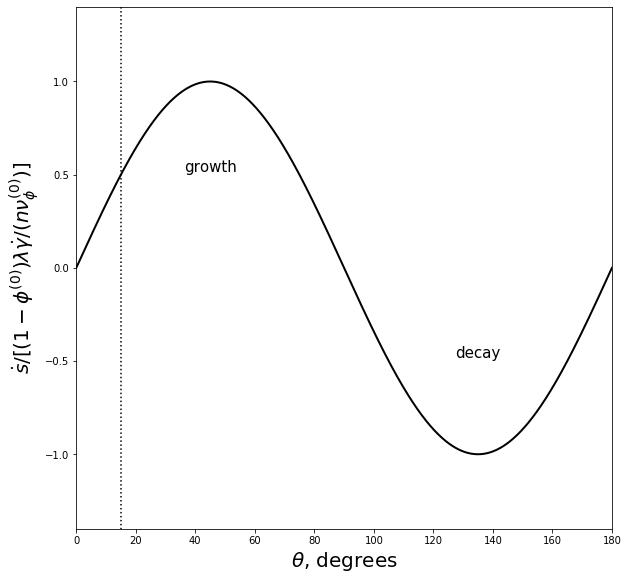

In [16]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(4.8 * zoom, 4.8 * zoom)
f.set_facecolor('w')

theta = np.linspace(0., np.pi, 1000)

plt.plot([15., 15.], [-2., 2.],':k')
plt.plot(theta*180./np.pi, np.sin(2.*theta), '-k', linewidth=2)
#set(ax(1),'xtick',[0:45:180],'ytick',[-2:0.5:2])
ax.set_xlim(0., 180.)
ax.set_ylim(-1.4, 1.4)

plt.xlabel(r'$\theta$, degrees', fontsize=20)
plt.ylabel(r'$\dot{s}/[(1-\phi^{(0)})\lambda\dot{\gamma}/(n\nu^{(0)}_\phi)]$', fontsize=20)
plt.text(45., 0.5, 'growth', fontsize=15, ha='center', va='bottom')
plt.text(135., -0.5, 'decay', fontsize=15, ha='center', va='bottom')

plt.show()

#### Growth of porosity bands when $\strrexp\ge1$

The growth rate can be written as
\begin{equation}
  \label{eq:simpleshear-nonnewt-growthrate}
  \growrate = \left(1-\por\zeroth\right)
  \frac{\porweaken\shearstrainrate}{\strrexp\viscratio\zeroth}
    \frac{\left(\cmplength_0k\right)^2}
    {1 + \left(\cmplength_0k\right)^2}
    \left(\frac{\sin2\theta}{1-\strrexpc\cos^22\theta}\right).
\end{equation}

Figure below plots the normalised growth rate of small-wavelength ($\wavelength\ll\cmplength_0$) porosity bands under simple shear and non-Newtonian viscosity with various values of $\strrexp$. The vertical dotted lines mark $\theta=15^\circ$.

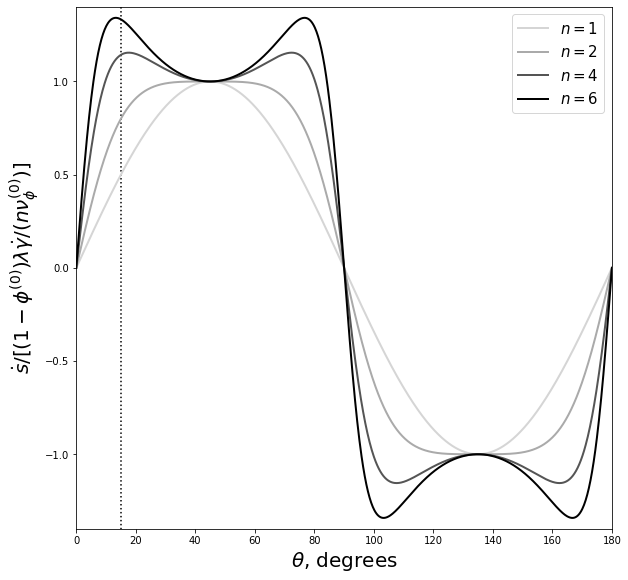

In [24]:
f, ax = plt.subplots()
zoom = 2.0
f.set_size_inches(4.8 * zoom, 4.8 * zoom)
f.set_facecolor('w')

plt.plot([15., 15.], [-2., 2.], ':k')
n = np.asarray((1, 2, 4, 6))
theta = np.linspace(0., np.pi, 1000)
for i in n:
    N = (i-1)/i
    colr = [1.0-i/np.amax(n), 1.-i/np.amax(n), 1.-i/np.amax(n)]
    plt.plot(theta*180./np.pi, np.sin(2.*theta)/(1.-N*np.cos(2.*theta)**2), '-k', 
             linewidth=2, label=r'$n='+str(i)+'$', color=colr)

#set(ax(2),'xtick',[0:45:180],'ytick',[-2:0.5:2],'yticklabel',[])
ax.set_xlim(0., 180.)
ax.set_ylim(-1.4, 1.4)
plt.xlabel(r'$\theta$, degrees', fontsize=20)
plt.ylabel(r'$\dot{s}/[(1-\phi^{(0)})\lambda\dot{\gamma}/(n\nu^{(0)}_\phi)]$', fontsize=20)
plt.legend(fontsize=15, loc='upper right')

plt.show()

#### Extending the analysis to finite strain

Restricting our focus to the case of wavelengths much smaller than the compaction length, we can obtain $s$ by integrating
\begin{equation}
  \label{eq:simpleshear-perturbation-amplitude}
  s(\bandangle,t) =
  \left(1-\por\zeroth\right)
  \frac{\porweaken\shearstrainrate}{\strrexp\viscratio\zeroth}\int_0^t
  \left(\frac{\sin2\theta(t')}{1-\strrexpc\cos^22\theta(t')}\right)\infd t',
\end{equation}
where $t'$ is a dummy variable of integration, to distinguish it from the (variable) upper limit of integration, $t$.

Figure below plots the amplitude of porosity perturbations $\e^{\growamp(t)}$ as a function of angle and strain $\gamma=\shearstrainrate t$. Dotted curves are passive advection trajectories from eqn. \eqref{eq:simpleshear-bandangle} with Newtonian viscosity ($\strrexp=1,\,\strrexpc=0$).

Figure below also plots the amplitude of porosity perturbations $\e^{\growamp(t)}$ as a function of angle and strain $\gamma=\shearstrainrate t$, but the dotted curves are passive advection trajectories consider Non-Newtonian viscosity ($\strrexp=6,\,\strrexpc=5/6$).

## Wavelength selection by surface tension